# Comparando classificadores 

In [6]:
import matplotlib.pyplot as plt
plt.style.use('default')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

In [7]:
df = pd.read_csv('./spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [13]:
textos = list(df['text'])
labels = list(df['label'])
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(textos)
X_train, X_test, y_train, y_test = train_test_split(X, labels)

In [16]:
model_nb = BernoulliNB()
model_nb.fit(X_train, y_train)
y_pred = model_nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.84      0.98      0.91       928
        spam       0.92      0.53      0.67       365

    accuracy                           0.85      1293
   macro avg       0.88      0.76      0.79      1293
weighted avg       0.86      0.85      0.84      1293



In [23]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(model_lr.classes_)

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       928
        spam       0.97      0.98      0.97       365

    accuracy                           0.98      1293
   macro avg       0.98      0.98      0.98      1293
weighted avg       0.98      0.98      0.98      1293

['ham' 'spam']


In [18]:
vocab = vectorizer.vocabulary_
palavras_ham = []
palavras_spam = []
for t in vocab.keys():
    coef = model_lr.coef_[0, vocab[t]]
    if coef>=0:
        palavras_ham.append( (coef, t) )
    else:
        palavras_spam.append( (-coef, t) )


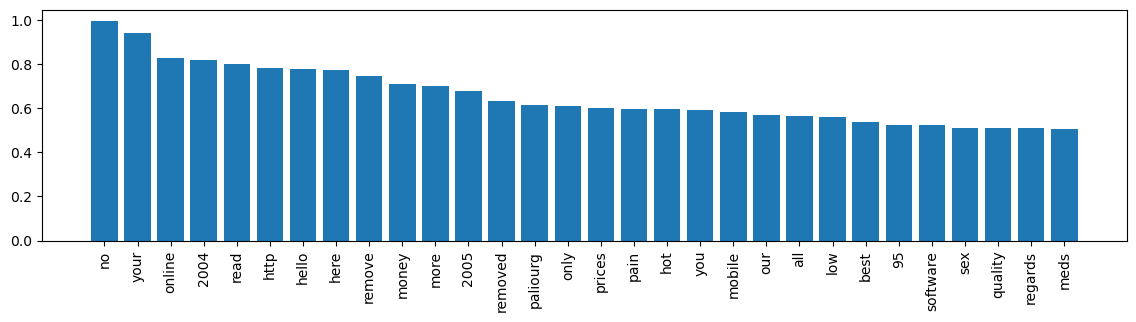

In [21]:
tuplas_ordenadas = sorted(palavras_ham, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]

n_palavras = 30
eixo_x = np.arange(n_palavras)
plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=90)
plt.show()

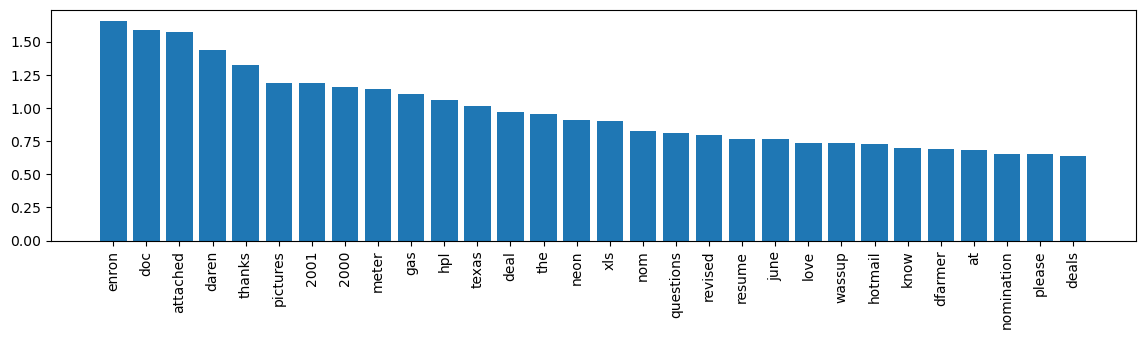

In [22]:
tuplas_ordenadas = sorted(palavras_spam, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]

n_palavras = 30
eixo_x = np.arange(n_palavras)
plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=90)
plt.show()